мини-исследование на тему связи между
некоторым словом и той или иной страной.
Предполагаемый порядок действий:
- 1) Скачать датасет с векторными представлениями слов (например, GloVe,
https://nlp.stanford.edu/projects/glove/ )
- 2) Извлечь из датасета названия стран мира и выделить их в отдельное
подмножество.
  - a. Для этого вам необходимо обучить бинарный классификатор:
    - i. Положительный класс: несколько названий стран (10-20 шт.)
    - ii. Отрицательный класс: случайные слова из датасета (1000-5000 шт.)
    - iii. Признаки – компоненты векторного представления слова
(embeddings)
  - b. Обученный классификатор применить на всем датасете, чтобы получить
больше названий стран.
  - c. Кластеризовать полученное множество и визуализировать результаты (с
помощью TSNE)

- 3) Для некоторого входного запроса (например, ‘coffee’) построить ранжированный
список стран (по близости слову из запроса). Можно использовать различные
метрики близости.
- 4) * На основе ранжированного списка отобразить результаты цветом на карте
мира: более насыщенный цвет должен быть у более близких к слову стран.

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-07-30 16:37:27--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-07-30 16:37:27--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2023-07-30 16:40:07 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [ ]:
import pandas as pd

df = pd.read_csv('glove.6B.300d.txt', sep=" ", quoting = 3, index_col=0)
df.head()

,0.04656,0.21318,-0.0074364,-0.45854,-0.035639,0.23643,-0.28836,0.21521,-0.13486,-1.6413,...,-0.013064,-0.29686,-0.079913,0.195,0.031549,0.28506,-0.087461,0.0090611,-0.20989,0.053913
the,,,,,,,,,,,,,,,,,,,,,
",",-0.255390,-0.257230,0.131690,-0.042688,0.218170,-0.022702,-0.178540,0.107560,0.058936,-1.3854,...,0.075968,-0.014359,-0.073794,0.221760,0.146520,0.566860,0.053307,-0.23290,-0.122260,0.354990
.,-0.125590,0.013630,0.103060,-0.101230,0.098128,0.136270,-0.107210,0.236970,0.328700,-1.6785,...,0.060148,-0.156190,-0.119490,0.234450,0.081367,0.246180,-0.152420,-0.34224,-0.022394,0.136840
of,-0.076947,-0.021211,0.212710,-0.722320,-0.139880,-0.122340,-0.175210,0.121370,-0.070866,-1.5721,...,-0.366730,-0.386030,0.302900,0.015747,0.340360,0.478410,0.068617,0.18351,-0.291830,-0.046533
to,-0.257560,-0.057132,-0.671900,-0.380820,-0.364210,-0.082155,-0.010955,-0.082047,0.460560,-1.8477,...,-0.012806,-0.597070,0.317340,-0.252670,0.543840,0.063007,-0.049795,-0.16043,0.046744,-0.070621
and,0.038466,-0.039792,0.082747,-0.389230,-0.214310,0.170200,-0.025657,0.095780,0.238600,-1.6342,...,0.045194,-0.204050,-0.210970,-0.110250,0.021766,0.441290,0.327970,-0.33427,0.011807,0.059703


In [ ]:
emb_dict = {key: val.values for key ,val in df.T.items()}

In [ ]:
emb_dict['china']

array([-0.11286  ,  0.033802 , -0.2941   , -0.75285  ,  0.054276 ,
       -0.54167  ,  0.068019 ,  0.59827  ,  0.40707  , -2.4216   ,
        0.67319  , -0.44478  ,  0.19267  , -0.132    , -0.27979  ,
       -0.17061  , -0.087901 , -0.032694 , -0.3663   ,  0.25004  ,
       -0.18012  ,  0.18174  ,  0.17109  ,  0.20651  , -0.52343  ,
        0.2936   , -0.14797  , -0.33627  ,  0.39343  ,  0.28431  ,
        0.29872  ,  0.62853  , -0.20346  ,  0.27751  , -1.0096   ,
        0.20671  , -0.12999  , -0.85432  , -0.42196  , -0.13     ,
        0.54003  ,  0.11573  , -0.12678  ,  0.32775  , -0.10726  ,
        0.2095   , -0.1187   ,  0.24351  , -1.0391   ,  0.25945  ,
        0.36425  ,  0.25624  , -0.23305  ,  0.17933  ,  0.21582  ,
        0.82448  ,  0.20714  ,  0.11903  , -0.25287  , -0.29569  ,
       -0.27008  ,  0.65743  , -0.022714 , -0.77507  ,  0.06398  ,
       -0.032921 ,  0.17008  ,  0.80824  , -0.58816  ,  0.21539  ,
       -0.20832  ,  0.30273  , -0.0052951, -0.16262  , -0.0821

In [ ]:
import torchtext


glove = torchtext.vocab.GloVe(name='6B',dim=300)

100%|█████████▉| 399999/400000 [00:36<00:00, 10996.08it/s]


In [ ]:
glove

In [ ]:
country_list = [['korea'],['russia'],['russian','federation']
                ,['japan'],['spain'],['great','britain'],['england']
                ,['us'],['united','states'],['brazil'],
                ['italy'],['united','arab','emirates'],
                ['turkey'],['south','korea'],['dprk'],['south','afrika'],
                ['uae'],['central','african','republic'],['bangladesh'],['india']]

print(len(country_list))

country_dict = {}

for c in country_list:
  if len(c)==1:
    country_dict[c[0]] = glove[c[0]]
  else:
    vec  = 0
    for cc in c:
      vec+=glove[cc]
    country_dict[' '.join(c)] = vec / len(c)







20


In [ ]:
import numpy as np

exclude_list = []
for key in country_dict.keys():
  if len(key.split()) ==1:
    exclude_list.append(key)
  else:
    exclude_list.extend(key.split())
exclude_list

['korea',
 'russia',
 'russian',
 'federation',
 'japan',
 'spain',
 'great',
 'britain',
 'england',
 'us',
 'united',
 'states',
 'brazil',
 'italy',
 'united',
 'arab',
 'emirates',
 'turkey',
 'south',
 'korea',
 'dprk',
 'south',
 'afrika',
 'uae',
 'central',
 'african',
 'republic',
 'bangladesh',
 'india']

In [ ]:
dist = []

from scipy import spatial

for key in country_dict.keys():
  for key2 in country_dict.keys():
    dist.append(spatial.distance.cosine(country_dict[key],country_dict[key2]))

In [ ]:
sum(dist)/len(dist)

0.6308772820653394

In [ ]:
import numpy as np
negative_class = {}
th = 0.6308772820653394

while len(negative_class) < 5000:
  idx = np.random.randint(0,len(glove))
  if list(glove.stoi.keys())[idx] not in exclude_list:
    emb = glove[list(glove.stoi.keys())[idx]]

    dist_ = []
    for key in country_dict.keys():
      dist_.append(spatial.distance.cosine(country_dict[key],emb))

    if sum(dist_)/len(dist_) >= th:
      negative_class[list(glove.stoi.keys())[idx]] = emb




In [ ]:
len(negative_class)

5000

In [ ]:
negative_class.keys()

dict_keys(['tabasco', 'roj', 'accordion', 'rhaeto-romance', 'coppel', '3.215', 'seater', 'double-entry', 'dared', 'skaryszew', 'sanhaja', 'one-day', 'sistrum', 'index2.html', 'honegger', '143.50', 'homotopic', '117.92', 'marlinspike', 'binti', '102-mile', 'hdcam', 'inforum', 'duffell', 'cipollini', 'simpkins', 'successor', 'burnage', 'styrian', 'wyland', '1.134', '1504', 'elenco', 'boeotians', '2109', 'harleman', 'heilbronner', 'b-class', 'careworn', 'cthulhu', 'subminiature', 'langel', 'nanba', 'burung', "'03", '58-39', '237.1', 'wurz', 'anri', 'pyrrha', '53.28', 'dolidze', 'fad', 'zawahiri', 'aquaponics', 'coore', 'badong', 'revoting', 'decked', 'jungleland', 'co-operatively', 'fscs', 'xe', 'ţara', 'brulte', '13:24', 'servetto', 'sallal', 'tizoc', '1643', 'brookmeyer', 'heliothis', 'rankl', 'appraises', 'leglock', 'sandham', '24.13', 'lubicon', 'malavika', 'mcduff', 'louris', 'myocardial', 'aija', 'mulcaire', 'estivill', 'perception', 'taijiquan', 'duesenbergs', 'marris', 'euro312', 

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install focal-loss

In [ ]:
#20 - 1
#5001 - 0
import tensorflow as tf
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Input
import  tensorflow.keras.backend as K
from focal_loss import BinaryFocalLoss

def focal_loss_binary(alpha,gamma):

  def f_loss(y_true,y_pred):
    fl = SigmoidFocalCrossEntropy(alpha=alpha,gamma=gamma)
    #y_true_k = K.ones_like(y_true)
    focal_loss = fl(y_true,y_pred)
    return focal_loss
  return f_loss

class FocalLoss(tf.keras.losses.Loss):
    def __init__(self, gamma=2., alpha=4.,
                 reduction=tf.keras.losses.Reduction.AUTO, name='focal_loss'):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})
        """
        super(FocalLoss, self).__init__(reduction=reduction,
                                        name=name)
        self.gamma = float(gamma)
        self.alpha = float(alpha)

    def call(self, y_true, y_pred):
        """
        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.math.log(model_out))
        weight = tf.multiply(y_true, tf.pow(
            tf.subtract(1., model_out), self.gamma))
        fl = tf.multiply(self.alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)





model =  Sequential()
model.add(Input(shape=(300,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



model.compile(optimizer='adam',metrics=['accuracy'],loss=BinaryFocalLoss(gamma=2,pos_weight=20))



/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
x_train = list(country_dict.values())
x_train.extend(list(negative_class.values()))

x_train = [x.numpy() for x in x_train]
x_train = np.array(x_train)

y_train = np.zeros(shape=(x_train.shape[0]))

y_train[0:len(country_dict)+1] = 1.

In [ ]:
y_train

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
class_weight = {0:1, 1:20}

model.fit(x_train,y_train,epochs=7,shuffle=True,batch_size=64)

Epoch 1/7
79/79 [==============================] - 3s 4ms/step - loss: 0.0254 - accuracy: 0.9906
Epoch 2/7
79/79 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 0.9984
Epoch 3/7
79/79 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 0.9990
Epoch 4/7
79/79 [==============================] - 0s 2ms/step - loss: 4.2727e-04 - accuracy: 0.9998
Epoch 5/7
79/79 [==============================] - 0s 2ms/step - loss: 2.0871e-04 - accuracy: 1.0000
Epoch 6/7
79/79 [==============================] - 0s 2ms/step - loss: 1.4680e-04 - accuracy: 0.9998
Epoch 7/7
79/79 [==============================] - 0s 2ms/step - loss: 6.4741e-05 - accuracy: 1.0000


In [ ]:
test_array = ['russia','sweden','malta','greece','mexico','france','algeria','andorra','vatican']

x_test = []
y_test = []

for tt in test_array:
  x_test.append(glove[tt].numpy())
  y_test.append(1.)


while len(x_test) < 2500:
  idx = np.random.randint(0,len(glove))
  if list(glove.stoi.keys())[idx] not in exclude_list and list(glove.stoi.keys())[idx] not in negative_class.keys():
    emb = glove[list(glove.stoi.keys())[idx]]

    dist_ = []
    for key in country_dict.keys():
      dist_.append(spatial.distance.cosine(country_dict[key],emb))

    if sum(dist_)/len(dist_) >= th:
      x_test.append(emb.numpy())
      y_test.append(0.)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
idx_1 = y_test==1.
idx_0 = y_test==0.

y_test[idx_1] = 0.
y_test[idx_0] = 1.

In [ ]:
model.evaluate(x_test,y_test)

79/79 [==============================] - 0s 1ms/step - loss: 120.6757 - accuracy: 0.0016


[120.67572784423828, 0.0015999999595806003]

In [ ]:
from sklearn.metrics import roc_curve, f1_score
fpr, tpr,th = roc_curve(y_test,model.predict(x_test))
J = tpr-fpr
ix = np.argmax(J)
best_th = th[ix]

#score = f1_score()

print("Best threshold: {}".format(best_th))

79/79 [==============================] - 0s 3ms/step
Best threshold: 1.9772422313690186


79/79 [==============================] - 0s 1ms/step


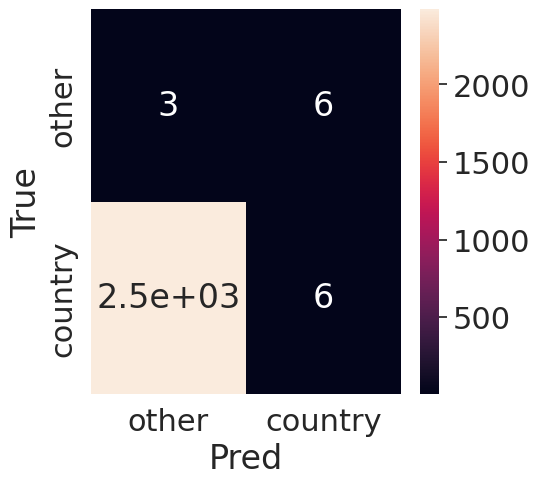

In [ ]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

predictions = model.predict(x_test)
predictions[predictions>=0.3] =1.
predictions[predictions<0.3] =0.

labels = ['other', 'country']
#labels = [ 'country','other']

max_test = y_test
max_pred = predictions

confusion_matrix = metrics.confusion_matrix(max_test,max_pred)

plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix,
            xticklabels=labels,
            yticklabels=labels,
            annot=True
            )
plt.ylabel('True')
plt.xlabel('Pred')
plt.show()

In [ ]:
x_test.shape

(2500, 300)

In [ ]:
from tqdm import tqdm_notebook

new_country = {}
new_country_raw = {}

for key in tqdm_notebook(glove.stoi.keys()):
  if len(new_country)> 100:
    break

  if len(key)>3:
    predictions = model.predict(glove[key].numpy().reshape(1,-1))
    if predictions > 0.7:
      new_country[key] = glove[key]
      new_country_raw[key] = predictions


In [ ]:
len(new_country)

77

In [ ]:
new_data_arr = np.zeros(300)

for i,key in enumerate(glove.stoi.keys()):
  if i >= 10000:
    break

  new_data_arr = np.vstack([new_data_arr,glove[key].numpy()])


In [ ]:
new_data_arr.shape

(10001, 300)

In [ ]:
predictions = model.predict(new_data_arr,batch_size=1000)

11/11 [==============================] - 0s 3ms/step


In [ ]:
np.array(list(glove.stoi.keys()))[np.where(predictions>0.7)[0]]

array(["n't", 'into', 'can', 'million', 'most', 'u.s.', 'during',
       'because', 'under', 'four', 'american', '?', 'security', '2',
       'use', 'see', 'does', 'league', 'white', 'too', 'central', '20',
       'near', 'head', 'director', 'went', 'though', 'given', 'prices',
       "'m", 'defense', 'move', 'august', 'german', 'station', 'sales',
       'lot', 'process', 'special', 'named', 'enough', 'results', 'key',
       '14', 'increase', '16', 'division', 'band', 'similar', 'st.',
       'budget', 'trading', 'opening', 'performance', '`', 'created',
       'analysts', 'effort', 'joined', 'language', 'begin', '27',
       'daughter', 'religious', 'estimated', 'taliban', '0', 'speaking',
       'damage', 'lived', 'telephone', 'greek', 'concerned', 'co',
       'writing', 'gets', 'entered', 'offers', 'seek', 'wrong', 'bob',
       'opposed', 'argentina', 'holds', 'mexican', 'agree', 'aids', 'row',
       'czech', 'stated', 'allows', 'animals', 'brief', 'avenue',
       'establish',

In [ ]:
new_country.keys()

dict_keys(['people', 'over', 'world', 'state', 'against', 'united', 'states', 'country', 'china', 'south', 'here', 'north', 'bank', 'iraq', 'countries', 'west', 'european', 'british', 'east', 'central', 'union', 'japan', 'region', 'france', 'russia', 'america', 'russian', 'nations', 'india', 'southern', 'germany', 'nation', 'german', 'europe', 'northern', 'iran', 'western', 'england', 'korea', 'australia', 'africa', 'pakistan', 'african', 'britain', 'crisis', 'canada', 'indian', 'eastern', 'asia', 'mexico', 'republic', 'biggest', 'italy', 'coast', 'beat', 'asian', 'spain', 'italian', 'korean', 'arab', 'turkey', 'warned', 'zealand', 'ireland', 'brazil', 'singapore', 'indonesia', 'vietnam', 'egypt', 'thailand', 'greek', 'saudi', 'turkish', 'gulf', 'poland', 'rich', 'malaysia'])

In [ ]:
idx_ = np.array(list(new_country_raw.values())).reshape(-1) >0.85

np.array(list(new_country.keys()))[idx_]

array(['state', 'united', 'states', 'country', 'china', 'south', 'north',
       'european', 'central', 'japan', 'france', 'russia', 'india',
       'southern', 'germany', 'europe', 'northern', 'iran', 'western',
       'england', 'korea', 'australia', 'africa', 'pakistan', 'britain',
       'asia', 'mexico', 'republic', 'italy', 'spain', 'turkey',
       'zealand', 'ireland', 'brazil', 'singapore', 'indonesia', 'egypt',
       'thailand', 'saudi', 'turkish', 'poland', 'malaysia'], dtype='<U9')

In [ ]:
new_country.keys()

dict_keys(['people', 'over', 'world', 'state', 'against', 'united', 'states', 'country', 'china', 'south', 'here', 'north', 'bank', 'iraq', 'countries', 'west', 'european', 'british', 'east', 'central', 'union', 'japan', 'region', 'france', 'russia', 'america', 'russian', 'nations', 'india', 'southern', 'germany', 'nation', 'german', 'europe', 'northern', 'iran', 'western', 'england', 'korea', 'australia', 'africa', 'pakistan', 'african', 'britain', 'crisis', 'canada', 'indian', 'eastern', 'asia', 'mexico', 'republic', 'biggest', 'italy', 'coast', 'beat', 'asian', 'spain', 'italian', 'korean', 'arab', 'turkey', 'warned', 'zealand', 'ireland', 'brazil', 'singapore', 'indonesia', 'vietnam', 'egypt', 'thailand', 'greek', 'saudi', 'turkish', 'gulf', 'poland', 'rich', 'malaysia'])

In [ ]:
check_split_countries = ['south','north','central','union','east','republic','states','western','federation','african','north east','central western','foreign','']

for term in check_split_countries:
  dist_ = []

  try:
    for country in new_country.keys():
      dist_.append(spatial.distance.cosine(new_country[country],new_country[term]))

    match_country = [x for x in  np.array(list(new_country.keys()))[np.argsort(dist_)] if x not in check_split_countries]

    new_vector = new_country[term]
    for country in match_country[:2]:
      new_vector+= new_country[country]


    new_country[term+' '+country] = new_vector / len(match_country[:2])

    del new_country[term]
  except:
    pass



In [ ]:
new_country.keys()

dict_keys(['people', 'over', 'world', 'state', 'against', 'united', 'country', 'china', 'here', 'bank', 'iraq', 'countries', 'west', 'european', 'british', 'japan', 'region', 'france', 'russia', 'america', 'russian', 'nations', 'india', 'southern', 'germany', 'nation', 'german', 'europe', 'northern', 'iran', 'england', 'korea', 'australia', 'africa', 'pakistan', 'britain', 'crisis', 'canada', 'indian', 'eastern', 'asia', 'mexico', 'biggest', 'italy', 'coast', 'beat', 'asian', 'spain', 'italian', 'korean', 'arab', 'turkey', 'warned', 'zealand', 'ireland', 'brazil', 'singapore', 'indonesia', 'vietnam', 'egypt', 'thailand', 'greek', 'saudi', 'turkish', 'gulf', 'poland', 'rich', 'malaysia', 'south korea', 'north korea', 'central bank', 'union nations', 'east eastern', 'republic poland', 'states countries', 'western east eastern', 'african south korea'])

(77, 300)


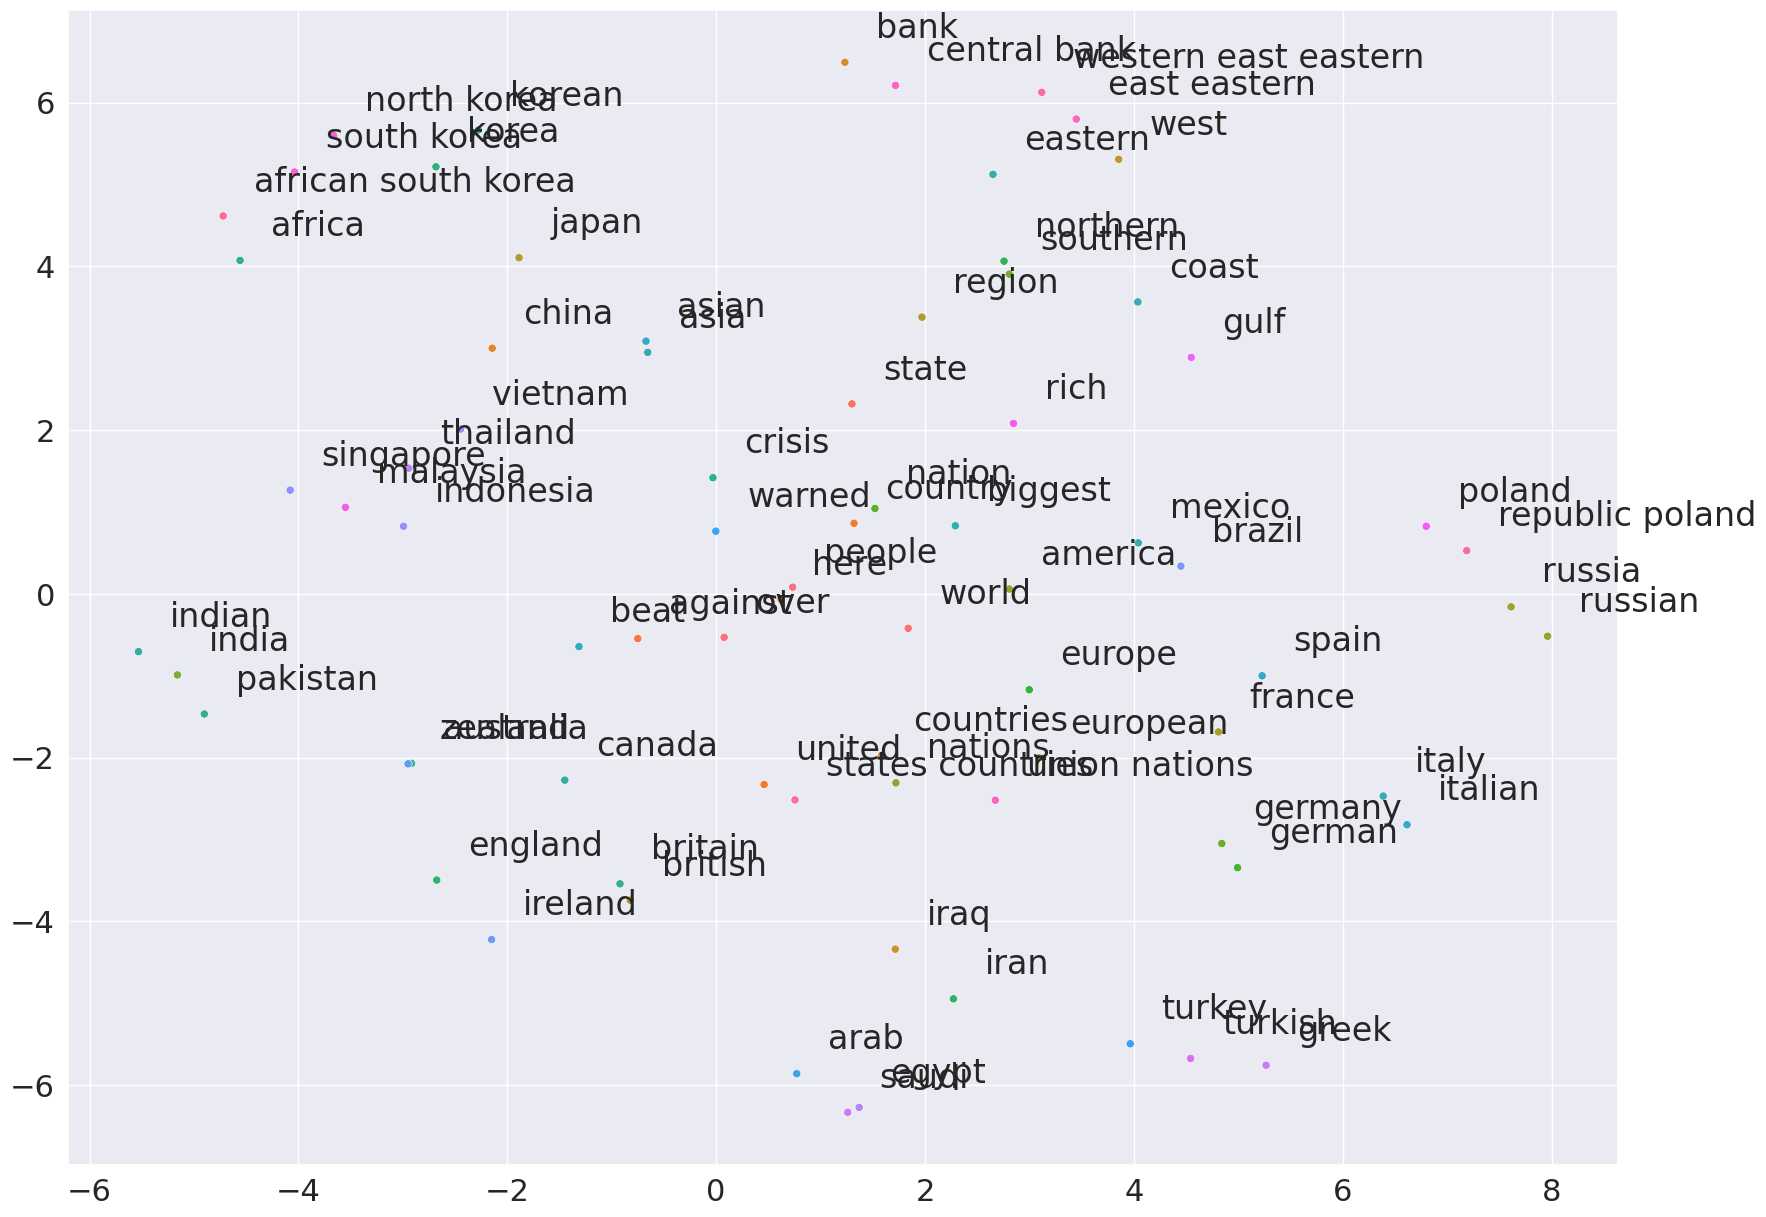

In [ ]:
#Кластеризовать полученное множество и визуализировать результаты(с помощью TSNE)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

X = np.array([x.numpy() for x in new_country.values() ] )

emb_tsne = TSNE(n_components=2,init='random').fit_transform(X)


plt.figure(figsize=(20,15))

sns.scatterplot(x = emb_tsne[:,0], y= emb_tsne[:,1],hue = list(new_country.keys()),legend=False)

for i, key in enumerate(new_country.keys()):
  plt.text(x=emb_tsne[i,0]+0.3,y=emb_tsne[i,1]+0.3,s=key)

print(X.shape)

In [ ]:
#Для некоторого входного запроса(например, ‘coffee’) построить ранжированный списокстран (по близости слову из запроса). Можно использовать различные метрики близости

key = 'coffee'

key_vec = glove[key].numpy()

dist_ = []

for country in new_country.keys():
  dist_.append(spatial.distance.jaccard(new_country[country].numpy(),key_vec))

match_country =  np.array(list(new_country.keys()))[np.argsort(dist_)][:10]

print(match_country)


['people' 'ireland' 'zealand' 'warned' 'turkey' 'arab' 'korean' 'italian'
 'spain' 'asian']


In [ ]:
#На  основе  ранжированного  списка  отобразить  результаты  цветом  на  карте мира: более насыщенный цвет должен быть у более близких к слову стран.
!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

--2023-07-30 16:49:30--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip [following]
--2023-07-30 16:49:31--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 13.249.85.30, 13.249.85.37, 13.249.85.44, ...
Connecting to naciscdn.org (naciscdn.org)|13.249.85.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K  1.03MB/s    in 0.2s    

2023-07-30 16:49:31 (1.03 MB/s) - ‘ne_110m_a

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

gdf = gpd.read_file('ne_110m_admin_0_countries.shp')[['SOVEREIGNT','SOV_A3','geometry']]

gdf.head()

,SOVEREIGNT,SOV_A3,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,US1,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

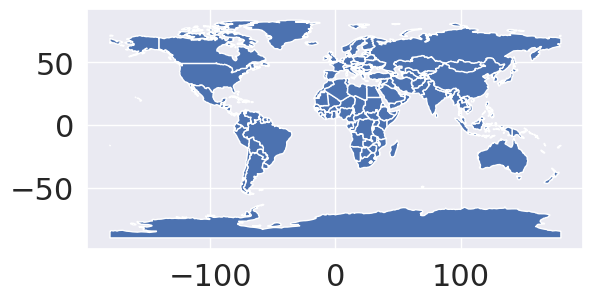

In [ ]:
gdf.plot()

In [ ]:
#gdf['country']  = list(new_country.keys())
#gdf['distance'] = dist_

#for country in new_country.keys():


new_country.keys()

dict_keys(['people', 'over', 'world', 'state', 'against', 'united', 'country', 'china', 'here', 'bank', 'iraq', 'countries', 'west', 'european', 'british', 'japan', 'region', 'france', 'russia', 'america', 'russian', 'nations', 'india', 'southern', 'germany', 'nation', 'german', 'europe', 'northern', 'iran', 'england', 'korea', 'australia', 'africa', 'pakistan', 'britain', 'crisis', 'canada', 'indian', 'eastern', 'asia', 'mexico', 'biggest', 'italy', 'coast', 'beat', 'asian', 'spain', 'italian', 'korean', 'arab', 'turkey', 'warned', 'zealand', 'ireland', 'brazil', 'singapore', 'indonesia', 'vietnam', 'egypt', 'thailand', 'greek', 'saudi', 'turkish', 'gulf', 'poland', 'rich', 'malaysia', 'south korea', 'north korea', 'central bank', 'union nations', 'east eastern', 'republic poland', 'states countries', 'western east eastern', 'african south korea'])

In [ ]:
import pandas as pd

gdf['distance'] = 0

key = 'tea'

key_vec = glove[key].numpy()

for country in new_country.keys():

  df = pd.DataFrame()

  for c in country.split():
    df = df.append(gdf[gdf.SOVEREIGNT.str.lower().str.contains(c)])

  if df.shape[0]==0:
    continue

  country_ = df.groupby('SOVEREIGNT').count().sort_values('SOV_A3',ascending=False).iloc[0].name


  gdf.loc[gdf.SOVEREIGNT == country_,'distance'] = spatial.distance.jaccard(new_country[country].numpy(),key_vec)

#


In [ ]:
gdf['distance'] = 1./ gdf['distance']

gdf['distance'] = gdf['distance'] / 1.348589
gdf[(gdf['distance']>0)&(gdf['distance']!=np.inf)].sort_values('distance')

,SOVEREIGNT,SOV_A3,geometry,distance
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.741516
107,Iran,IRN,"POLYGON ((48.56797 29.92678, 48.01457 30.45246...",0.741516
113,Poland,POL,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",0.741516
121,Germany,DEU,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",0.741516
124,Turkey,TUR,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",0.741516
132,Spain,ESP,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",0.741516
133,Ireland,IRL,"POLYGON ((-6.19788 53.86757, -6.03299 53.15316...",0.741516
134,France,FR1,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7...",0.741516
136,New Zealand,NZ1,"MULTIPOLYGON (((176.88582 -40.06598, 176.50802...",0.741516
137,Australia,AU1,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",0.741516


In [ ]:
gdf.loc[(gdf['distance']==np.inf),'distance'] = 0

In [ ]:
%matplotlib inline

from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, ColorBar,ColorMapper, LinearColorMapper
from bokeh.palettes import brewer
import json

geodata = GeoJSONDataSource(geojson=json.dumps(json.loads(gdf.to_json())))

#color indicator
palette = brewer['YlGnBu'][8][::-1]

mapper = LinearColorMapper(palette=palette, low=0, high=1)

color_bar = ColorBar(color_mapper=mapper,orientation='horizontal')

ff = figure(title='Map density for keyword {}'.format(key))
ff.xgrid.grid_line_color = None
ff.ygrid.grid_line_color = None

ff.patches('xs','ys',source= geodata, fill_color= {'field':'distance','transform':mapper},line_color='black')

ff.add_layout(color_bar,'below')

output_notebook()

show(ff)